In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nyc_taxi_final-1560498097450/nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

        **Colums in the Dataset**

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

id : Is unique


In [7]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

NO null values

In [8]:
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [9]:
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [10]:
date = pd.DatetimeIndex(data['pickup_datetime'])

In [11]:
drop_date = pd.DatetimeIndex(data['dropoff_datetime'])

In [12]:
data['doy_pickup'] = date.dayofyear
data['woy_pickup'] = date.weekofyear
data['moy_pickup'] = date.month
data['dow_pickup'] = date.day_name()
data['time_pickup'] = date.hour

For seperating the values of the date given

In [13]:
data['doy_dropoff'] = drop_date.dayofyear
data['woy_dropoff'] = drop_date.weekofyear
data['moy_dropoff'] = drop_date.month
data['dow_dropoff'] = drop_date.day_name()
data['time_dropoff'] = drop_date.hour

Same

In [14]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,doy_pickup,woy_pickup,moy_pickup,dow_pickup,time_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff,time_dropoff
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,...,60,9,2,Monday,16,60,9,2,Monday,16
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,...,308,44,11,Thursday,23,308,44,11,Thursday,23
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,...,52,7,2,Sunday,17,52,7,2,Sunday,18
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,...,122,17,5,Sunday,9,122,17,5,Sunday,10
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,...,48,7,2,Wednesday,6,48,7,2,Wednesday,6


In [15]:
data = data.drop(columns = ['pickup_datetime'])

In [16]:
data = data.drop(columns = ['dropoff_datetime'])

In [17]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,time_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff,time_dropoff
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,9,2,Monday,16,60,9,2,Monday,16
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,308,44,11,Thursday,23,308,44,11,Thursday,23
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,7,2,Sunday,17,52,7,2,Sunday,18
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,122,17,5,Sunday,9,122,17,5,Sunday,10
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,7,2,Wednesday,6,48,7,2,Wednesday,6


# Univariate Analysis

    *Mostly based on Central Tendencies.*

In [18]:
data.select_dtypes(include = ['int64', 'float64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
doy_pickup             int64
woy_pickup             int64
moy_pickup             int64
time_pickup            int64
doy_dropoff            int64
woy_dropoff            int64
moy_dropoff            int64
time_dropoff           int64
dtype: object

In [19]:
Vendor_Details = ['vendor_id']
Trip_Details = ['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']
Trip_Timing = ['doy_pickup','woy_pickup','moy_pickup','doy_dropoff','woy_dropoff','moy_dropoff']

In [20]:
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

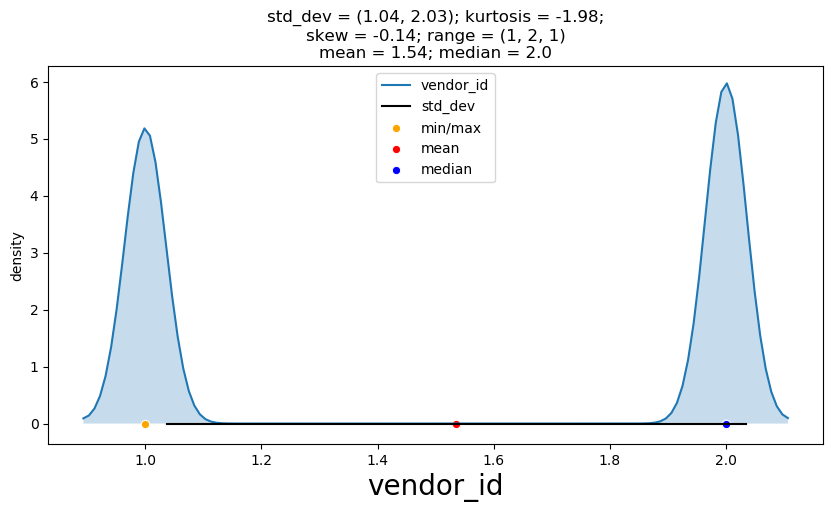

In [21]:
UVA_numeric(data,Vendor_Details)

**Summary** :
    *Two types of VENDORS are there from the above.*

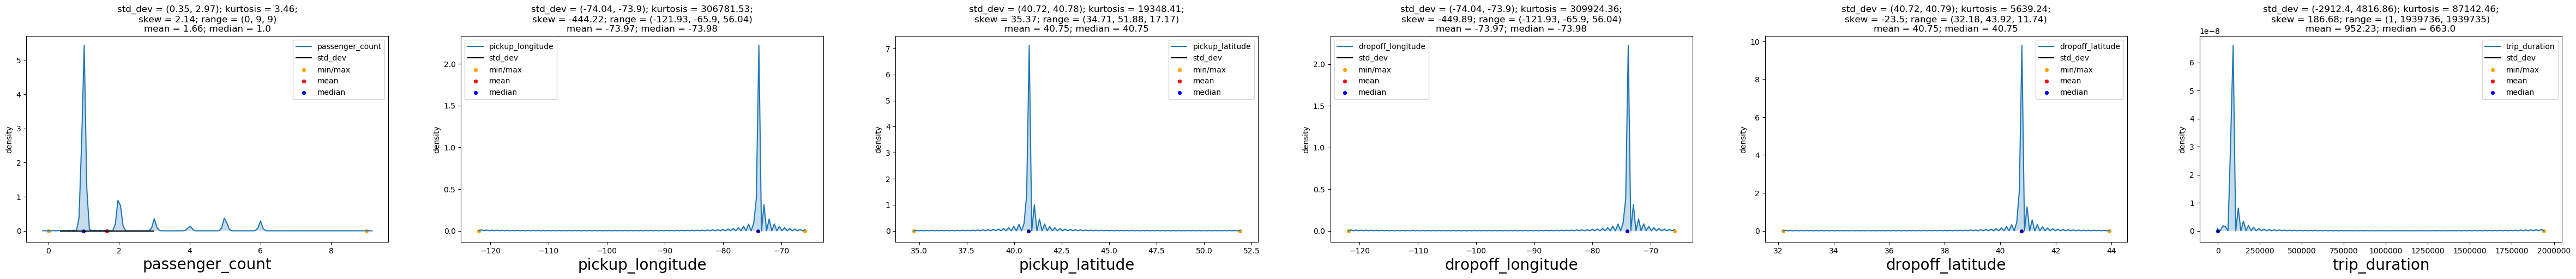

In [22]:
UVA_numeric(data, Trip_Details)

# Summary 
    >Mostly boarding passengers are 1 (Median)
    >PickUp Longitude: Mostly at -73.98W and on Avg -73.97 (Not a big Diff)
    >PickUp Latitude: At 40.75N
    >Trip Duration: Intrestingly gives diff values for Mean and Median(Indicates presence of outliers)

In [23]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True
True
True


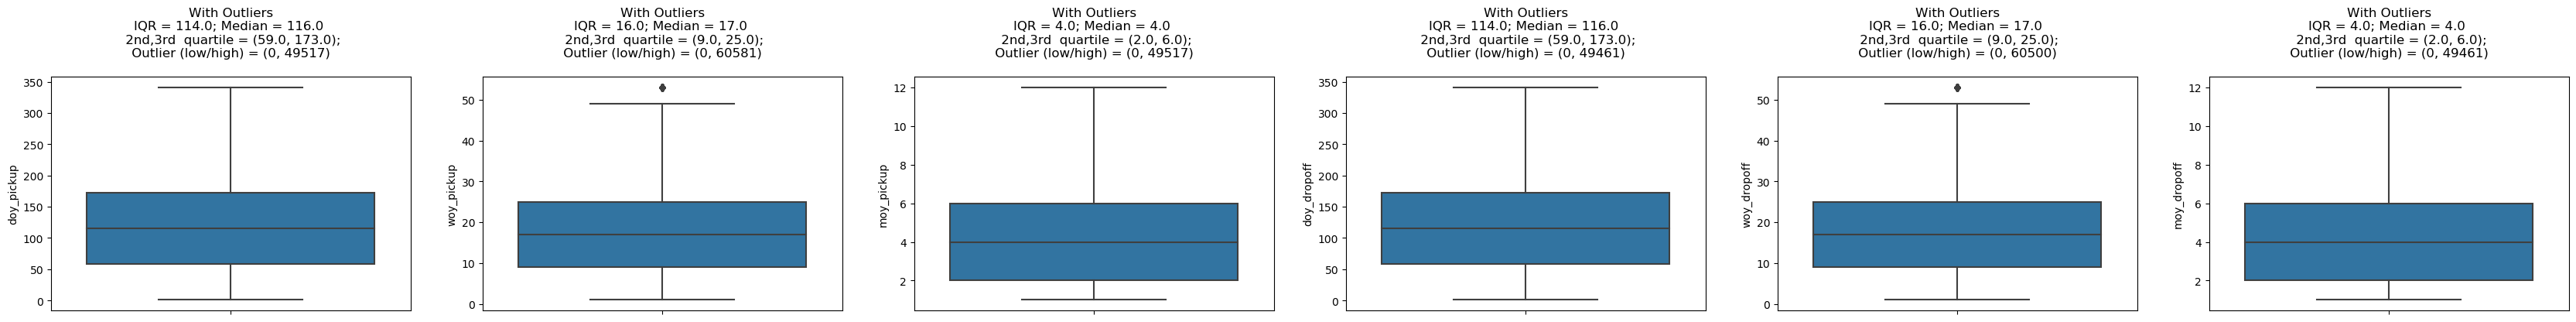

In [24]:
UVA_outlier(data, Trip_Timing)

* **Clearly we can say that there are Outliers in week_of_year at pickup and dropoff.**

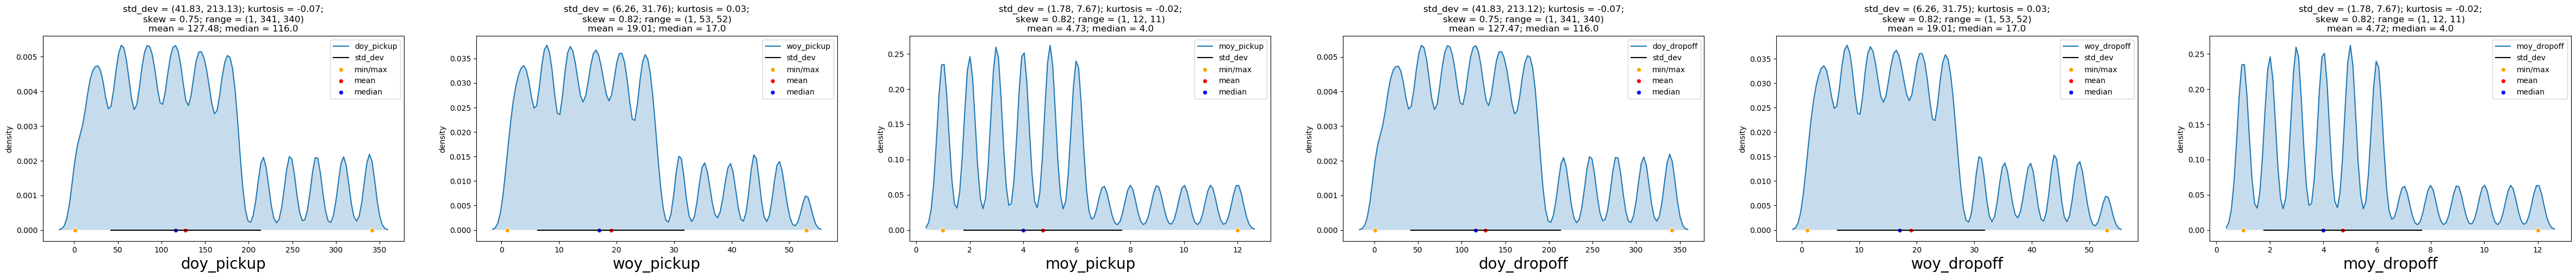

In [25]:
UVA_numeric(data, Trip_Timing)

# Outliers in Trip Duration

Text(0.5, 1.0, 'trip duration')

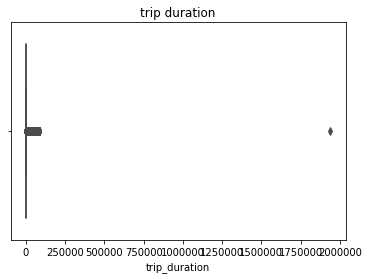

In [26]:
sns.boxplot(data['trip_duration'],orient='horizontal', color = 'Red')
plt.title("trip duration")

  **> Trip Duration is the variable we need to work on.**\n
      >Our Outlier is somewhere at 18.5L-19.5L sec

In [27]:
data.shape

(729322, 19)

In [28]:
data = data[data.trip_duration != data.trip_duration.max()]

In [29]:
data.shape

(729321, 19)

* **Noticed that the shape of the data before and the removal of the outlier.**  

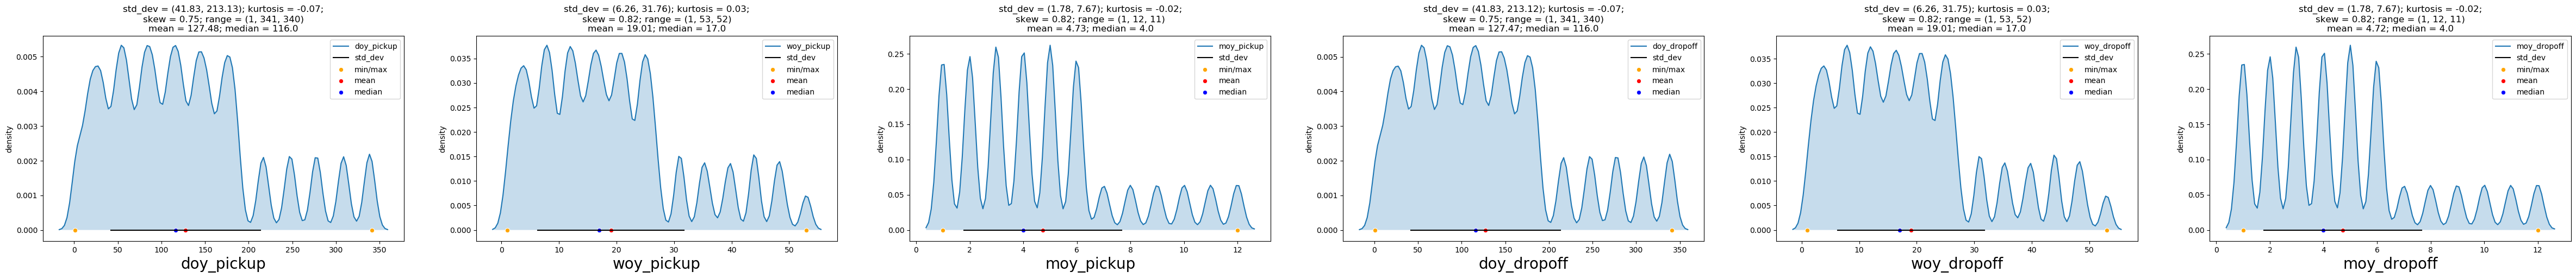

In [30]:
UVA_numeric(data, Trip_Timing)

   ** >From the 6 graphs we can say that 1st half of the year has more Taxi trips than in the 2nd half of the year.**

Text(0.5, 1.0, 'Total dropoffs done on each day of the week')

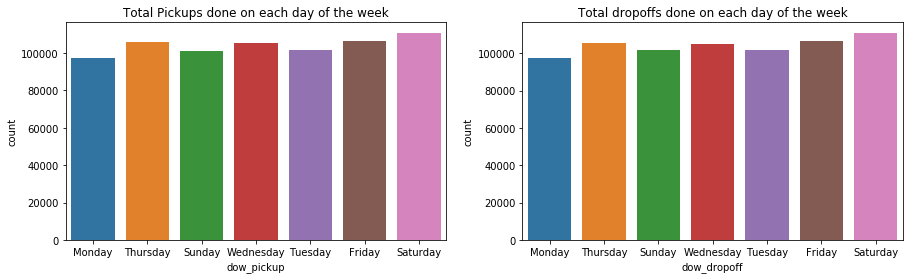

In [31]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize = (15,4))
sns.countplot(x ='dow_pickup',data=data,ax=ax[0])
ax[0].set_title('Total Pickups done on each day of the week')
sns.countplot(x ='dow_dropoff',data=data,ax=ax[1])
ax[1].set_title('Total dropoffs done on each day of the week')
#plt.tight_layout()

    >Both the PickUps and Dropoffs are similar(i.e They drop one and Pick one at the same location)

# Bivariate Analysis 

    *For 2 variable representation.*

Text(0.5, 1, 'The Average Duration of the Trip to Dropoff Day of the week')

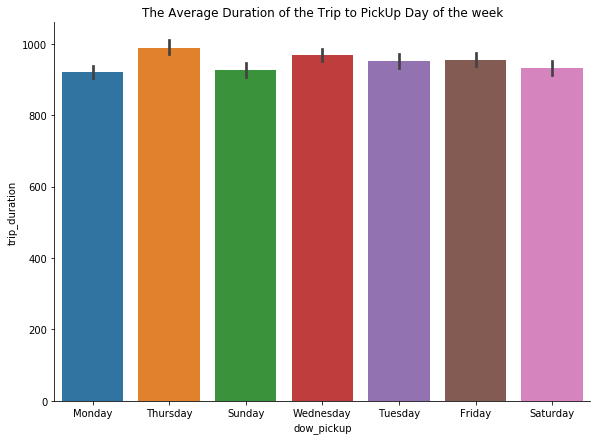

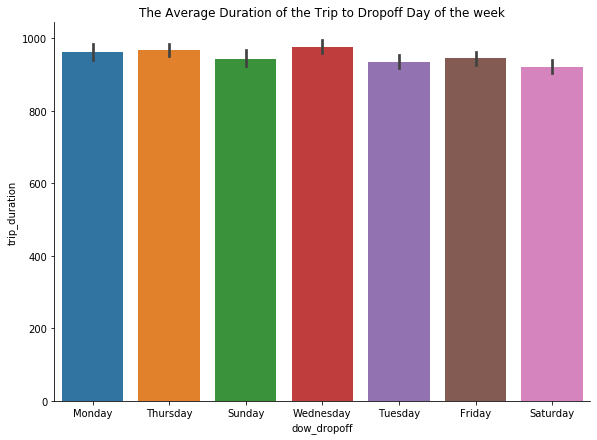

In [56]:
sns.catplot(x="dow_pickup",y="trip_duration",kind="bar",data=data,height=6,aspect=1.4)
plt.title('The Average Duration of the Trip to PickUp Day of the week')
sns.catplot(x="dow_dropoff",y="trip_duration",kind="bar",data=data,height=6,aspect=1.4)
plt.title('The Average Duration of the Trip to Dropoff Day of the week')

* **Thursday has the max Trips as the Pickup and Dropoffs are more on that day.**

In [41]:
spaces=np.array([0,1800,3600,5400,7200,90000])
data['duration_time']=pd.cut(data.trip_duration,spaces,labels=["< 5", "5-10", "10-15","15-20",">20"])

## Duration Time vs Day of week Picked up

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

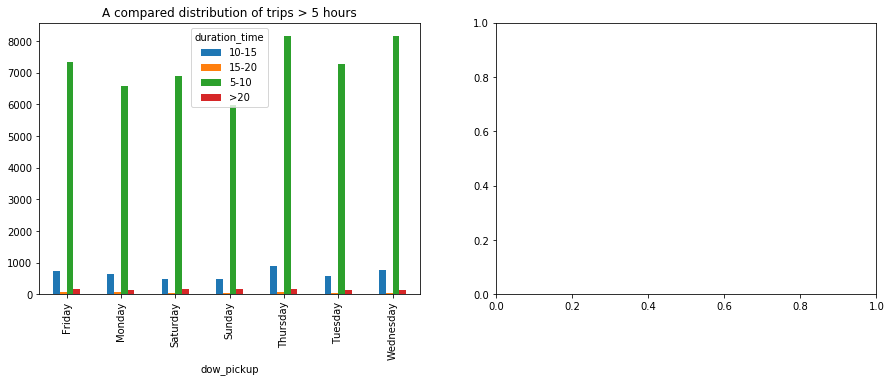

In [52]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax3 = data[(data.duration_time !="< 5")].groupby('dow_pickup')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[0])
ax[0].set_title('A compared distribution of trips > 5 hours')

* **Thursday and Wednesday has Max Duration Time.**
* **Also Thursday has 10-15 Hrs of duration time.**

## No. of Passenger vs Trip Duration

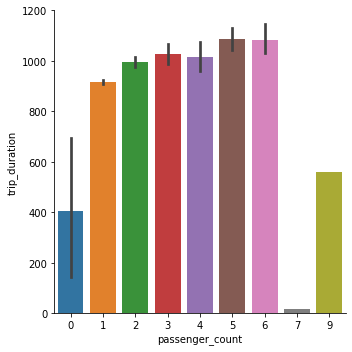

In [58]:
sns.catplot(x="passenger_count", y="trip_duration", data=data, kind="bar")

* **Not More than 6 passengers are boarding the taxi on Average.**
* **Except few outliers, Which are max passengers of 9**

## Vendor id vs Duration

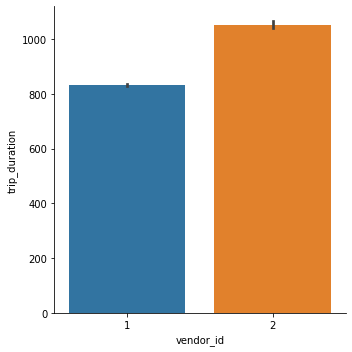

In [57]:
sns.catplot(x="vendor_id", y="trip_duration",kind="bar",data=data)

**Trip Duration is more with the Vendor_id with value 2.**

## Trip Duration vs Store and fwd Flag

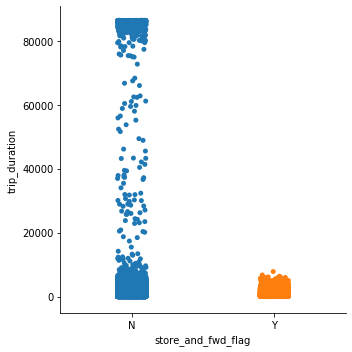

In [55]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=data)

**store_and_fwd_flag of 'N' has greater Trip Duration.**
* **Which is registerd as N.**

# Summary

* **Trip Duration is not more than 20 hours.**
* **Most trips are taken on Friday, Saturday and Thursday.**
* **The average duration of a trip is most on Thursday and Wednesday as trips longer than 5 hours are mostly taken in these days.**
* **The largest average duration of trips started is in between 14 hours and 17 hours.**